In [1]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


Load input images


In [2]:
import cv2 as cv

input_image_list = []
for i in range(1):
    file_path = f'../data/{i}.png'
    image = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
    input_image_list.append((image, file_path))

Straighten images and remove grid lines

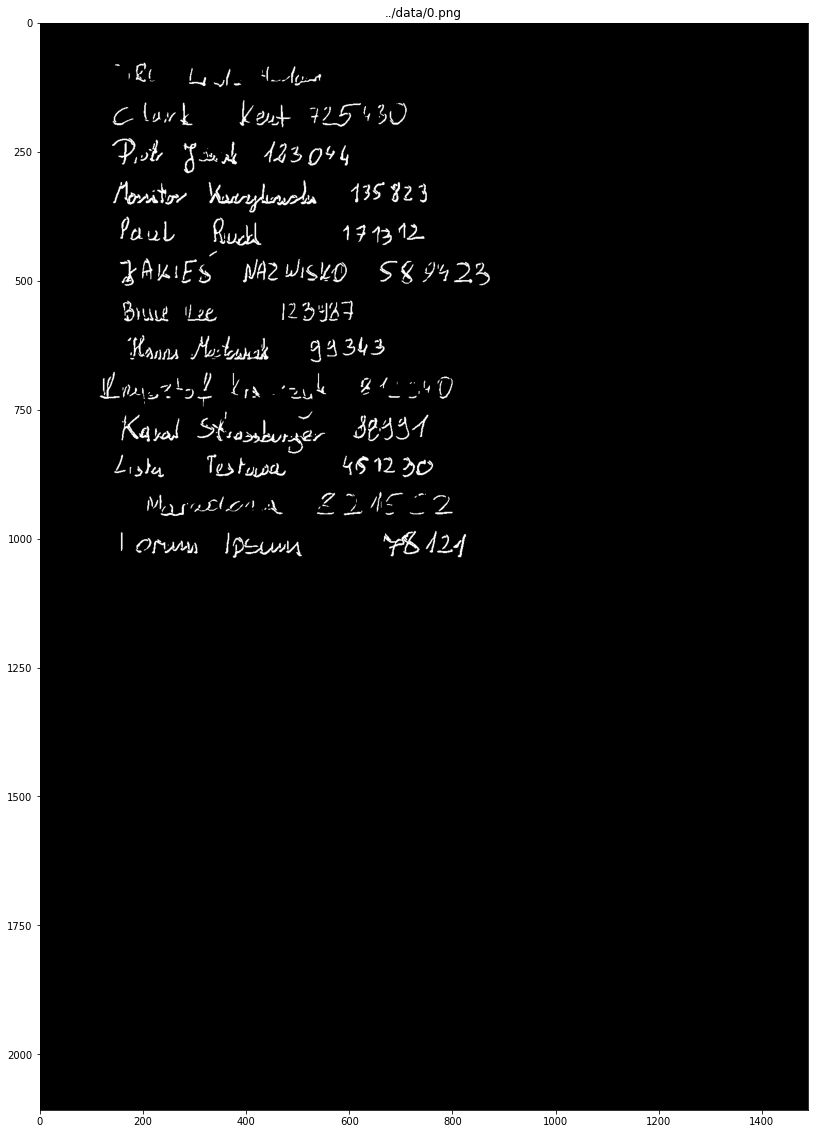

Took : 11.968s


In [3]:
from time import time

from matplotlib import pyplot as plt

from pipeline_grid_removal import straighten_page, remove_grid_lines

image_list = []
image_moments = []
for image, file_path in input_image_list:
    time_start = time()
    image_straightened, moments = straighten_page(image)
    image_no_grid = remove_grid_lines(image_straightened)

    plt.figure(figsize=(20, 20))
    plt.title(file_path)
    plt.imshow(image_no_grid, cmap='gray')
    plt.show()

    duration = time() - time_start
    duration = round(duration, 3)
    print(f'Took : {duration}s')

    image_list.append(image_no_grid)
    image_moments.append(moments)

Do something

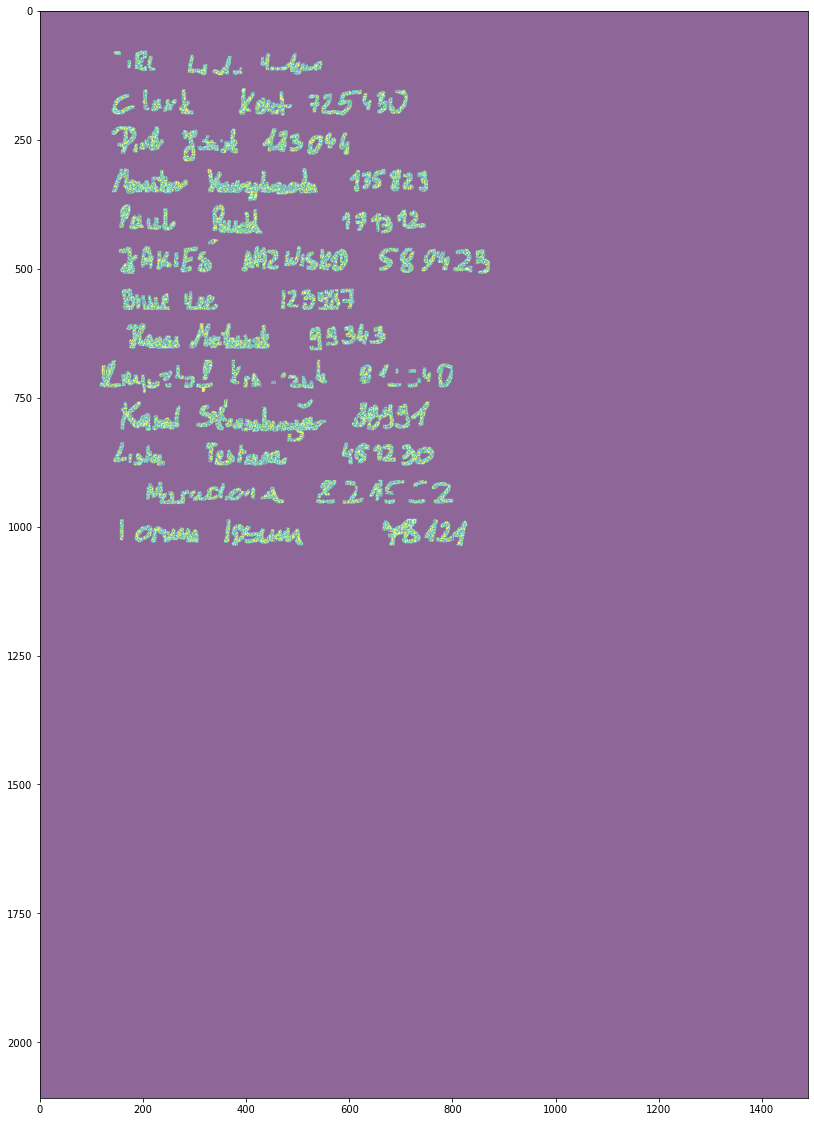

In [4]:
from pipeline_word_detection import get_clusters

cluster_list = get_clusters(image_list)

for clusters in cluster_list:
    plt.figure(figsize=(20, 20))
    plt.imshow(clusters, alpha=0.6)
    plt.show()

Detect words and numbers

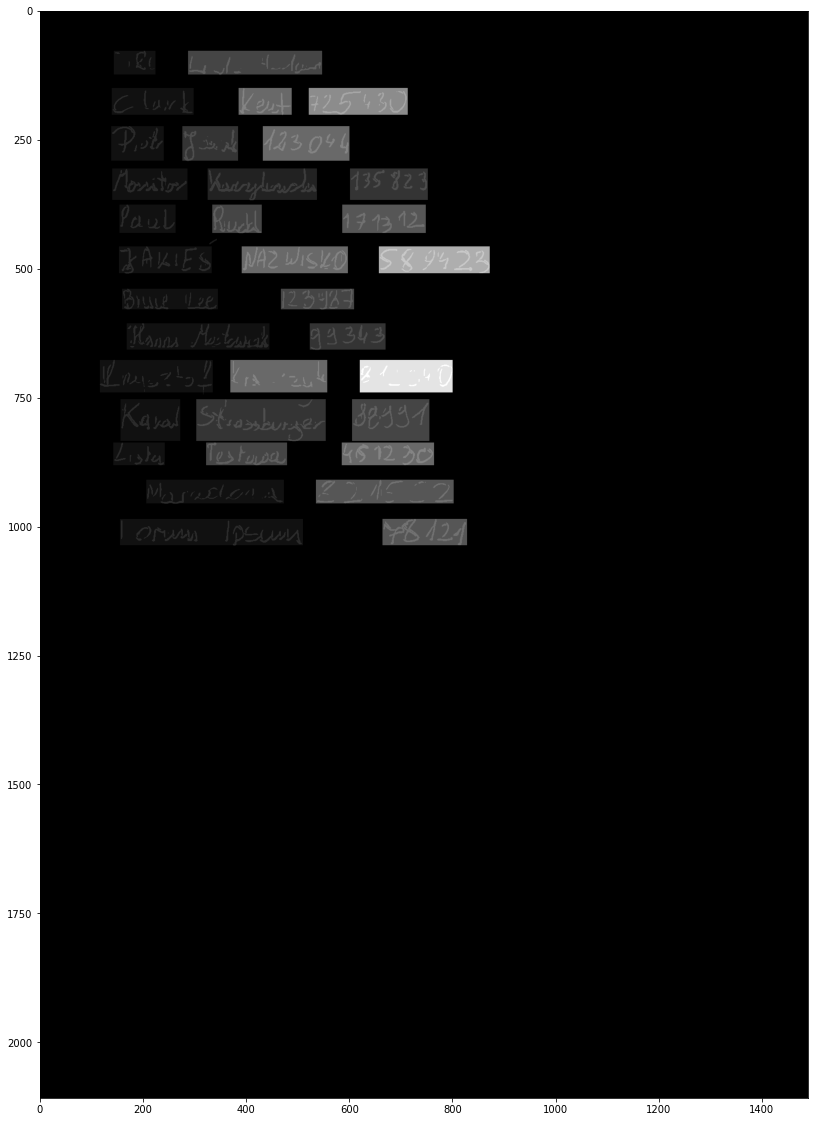

In [5]:
from pipeline_word_detection import get_segmentation_mask

segmentation_result_list = get_segmentation_mask(image_list, cluster_list)
for (image_no_grid, segmentation_result) in zip(image_list, segmentation_result_list):
    rows = segmentation_result.image

    plt.figure(figsize=(20, 20))

    plt.imshow(image_no_grid, cmap='gray')
    plt.imshow(rows, alpha=0.9, cmap='gray')
    plt.show()

Get row and word locations

In [6]:
from pipeline_word_detection import get_row_descriptions

row_description_list = get_row_descriptions(image_list, segmentation_result_list)

# plt.figure(figsize=(20, 20))

# for r in row_description_list:
#     plt.imshow(r.data)
#     plt.show()
#
#     for w in r.words:
#         plt.imshow(w.data)
#         plt.show()

print(len(row_description_list), segmentation_result_list[0].background_cluster)


1 0


Reverse perspective transformation for mask

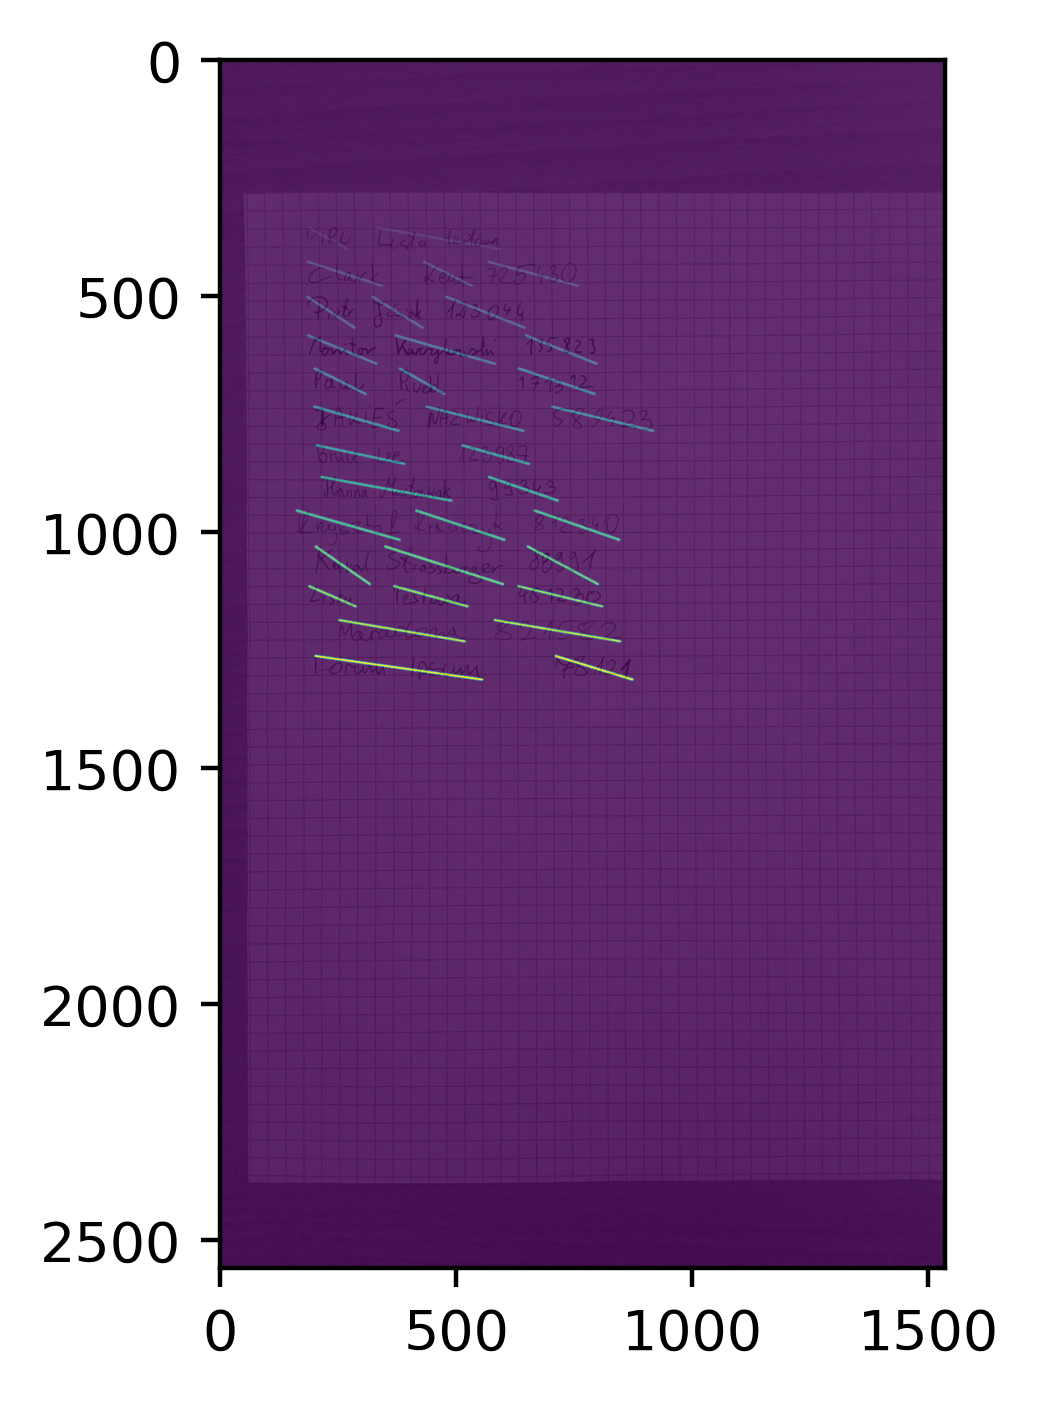

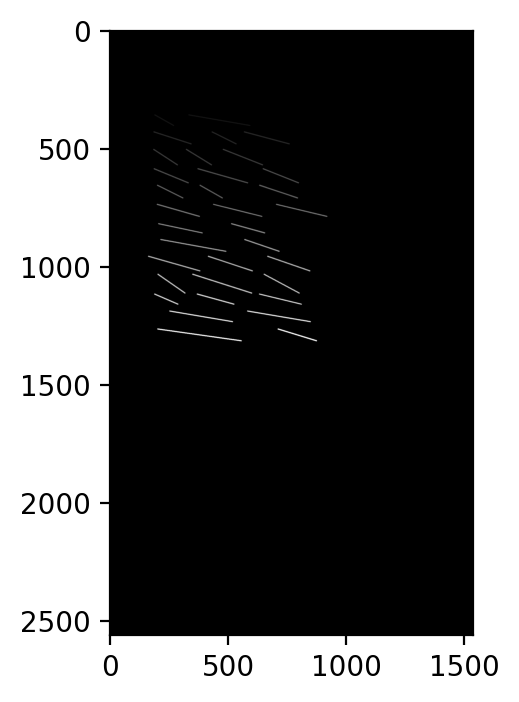

In [7]:
from pipeline_word_detection import create_mask

for (input_image, _), moments, row_descriptions in zip(input_image_list, image_moments, row_description_list):
    mask_shape = segmentation_result_list[0].image.shape
    output_shape = (input_image.shape[1], input_image.shape[0])
    warped_mask = create_mask(mask_shape, output_shape, row_descriptions, moments)

    plt.figure(dpi=400)
    plt.imshow(input_image, cmap="gray")
    plt.imshow(warped_mask, alpha=0.8)
    plt.show()

    plt.figure(dpi=200)
    plt.imshow(warped_mask, cmap="gray")
    plt.show()

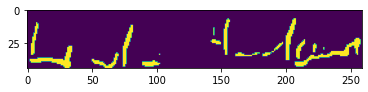

['2' '1' '2' '4' '1' '4']


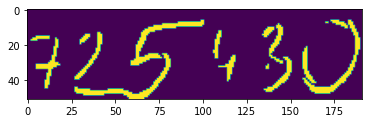

['3' '5' '4' '3' '0']


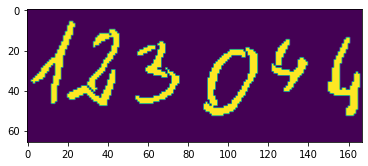

['1' '2' '3' '0' '4' '4']


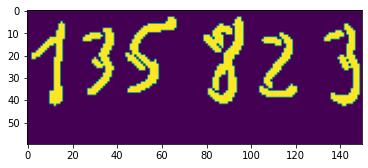

['9' '3' '5' '8' '2' '3']


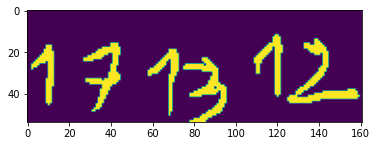

['7' '7' '0' '9' '2']


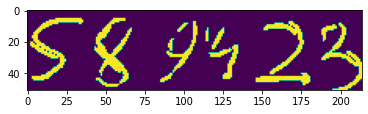

['5' '8' '4' '4' '2' '3']


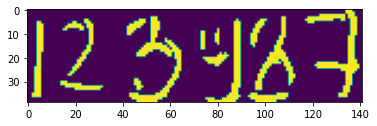

['1' '2' '3' '0' '3']


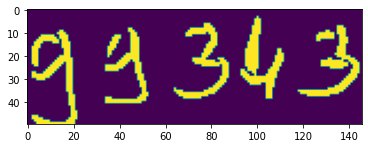

['9' '3' '3' '6' '3']


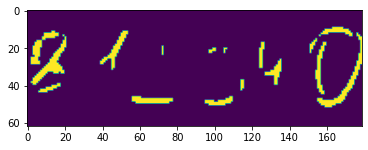

['8' '1' '4' '4' '0']


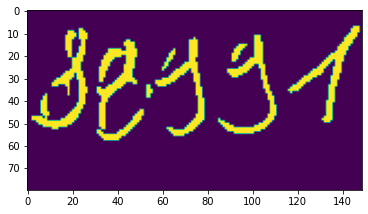

['3' '8' '3' '3' '4']


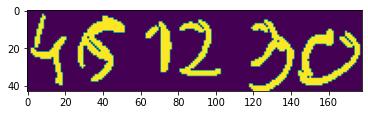

['4' '5' '7' '2' '6']


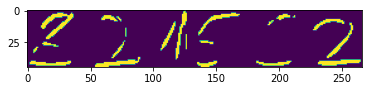

['8' '2' '3' '0' '4' '2']


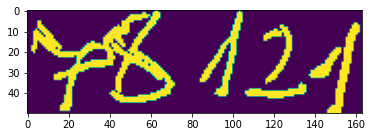

['4' '8' '4' '7' '4']


In [8]:
from src.pipeline_digit_recognition import segment_to_digits, digits_to_mnist_format, load_clf_and_dataset
from src.pipeline_digit_recognition import predict_digits  # Import has been split due to auto format issues
import os

if not os.path.exists("/pickled_objects"):
    os.mkdir("/pickled_objects")

clf_pickle_path = "/pickled_objects/clf_mnist.pickle"
clf = load_clf_and_dataset(clf_pickle_path)

for row_descriptions in row_description_list:
    for r in row_descriptions:
        number = r.words[-1].data
        plt.imshow(number)
        plt.show()

        digits = segment_to_digits(number)

        digits_to_mnist_format(digits)

        pred = predict_digits(clf, digits)
        print(pred)
